In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
%matplotlib inline 
import scipy

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Look at the shape of the data

In [6]:
print("Santander Value Prediction Challenge train -  rows:",train.shape[0]," columns:", train.shape[1])

('Santander Value Prediction Challenge train -  rows:', 4459, ' columns:', 4993)


In [7]:
print("Santander Value Prediction Challenge test -  rows:",test.shape[0]," columns:", test.shape[1])

('Santander Value Prediction Challenge test -  rows:', 49342, ' columns:', 4992)


Look at the beginning of the datasets

In [8]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [9]:
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Look for Missing Values

In [43]:
train.isnull().values.any()

False

In [44]:
test.isnull().values.any()

False

Look at Types of Features

In [15]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


Plot the Distribution of Target Variable

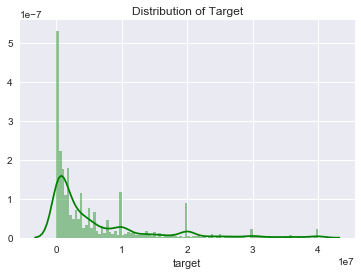

In [21]:
plt.title("Distribution of Target")
sns.distplot(train['target'].dropna(),color='green', kde=True,bins=100)
plt.show()

Look at the Violin Distribution of Target

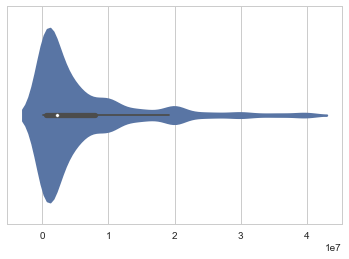

In [48]:
sns.set_style("whitegrid")
ax = sns.violinplot(x=train.target.values)
plt.show()

Due to Shape, Plot the Distribution of Log(Target)

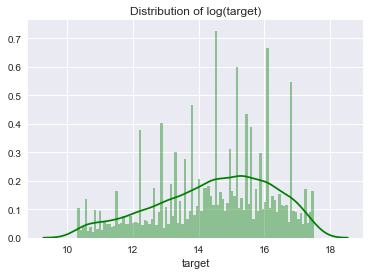

In [24]:
plt.title("Distribution of log(target)")
sns.distplot(np.log1p(train['target']).dropna(),color='green', kde=True,bins=100)
plt.show() 

Violin Plot of Log(Target)

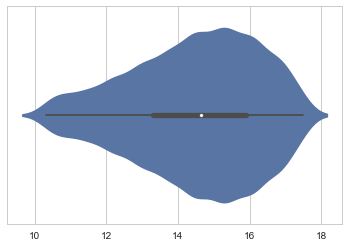

In [49]:
sns.set_style("whitegrid")
ax = sns.violinplot(x=np.log(1+train.target.values))
plt.show()

Identify Features that are Highly Correlated with target

C:\Users\m29480\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\m29480\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


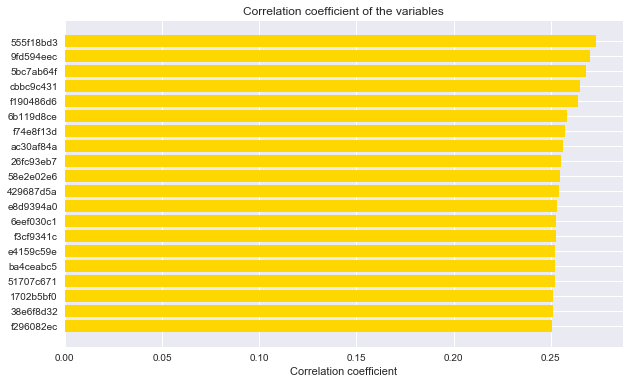

In [25]:
labels = []
values = []
for col in train.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(np.corrcoef(train_df[col].values, train_df["target"].values)[0,1])
corr_df = pd.DataFrame({'columns_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
 
corr_df = corr_df[(corr_df['corr_values']>0.25) | (corr_df['corr_values']<-0.25)]
ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,6))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='gold')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.columns_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

Build a Correlation Matrix of the Most Highly Correlated Features

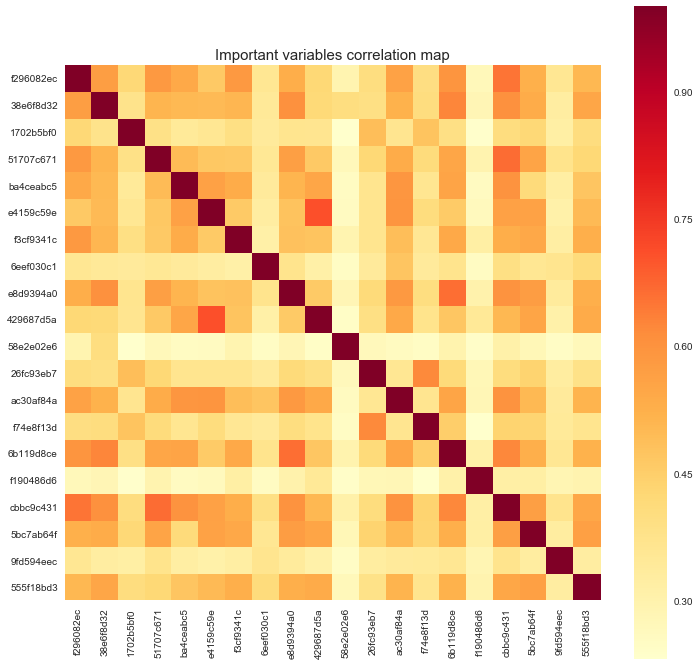

In [26]:
temp_df = train_df[corr_df.columns_labels.tolist()]
corrmat = temp_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap="YlOrRd")
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Find the Sparcity of Features

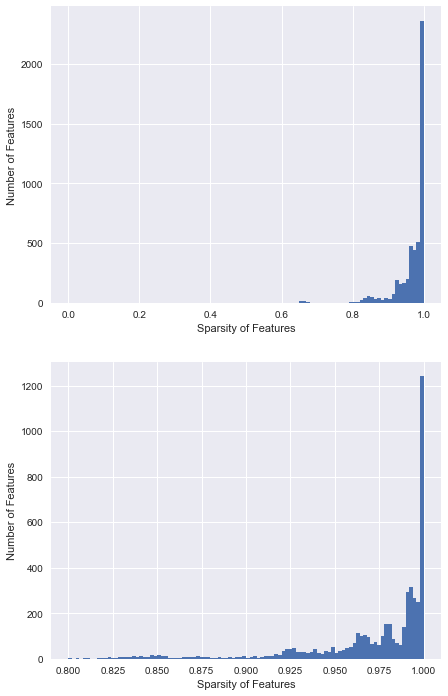

In [42]:
sparsity = {
    col: (train[col] == 0).mean()
    for idx, col in enumerate(train)
}
sparsity = pd.Series(sparsity)

fig = plt.figure(figsize=[7,12])
ax = fig.add_subplot(211)
ax.hist(sparsity, range=(0,1), bins=100)
ax.set_xlabel('Sparsity of Features')
ax.set_ylabel('Number of Features')
ax = fig.add_subplot(212)
ax.hist(sparsity, range=(0.8,1), bins=100)
ax.set_xlabel('Sparsity of Features')
ax.set_ylabel('Number of Features')
plt.show()  

May be good to remvove all features without sufficient variation -> not fully implemented